# Handson 07: Caracterização de variáveis aleatórias (PDF e CDF), Metodologia de Monte Carlo e Teorema Central do Limite


# Objetivos
As metas desse tutorial são ajudar o usuário a:
- Fazer uma breve revisão sobre parte da taxonomia associada a modelagem de fenômenos aleatórios;
- Fazer uma breve revisão e praticar a geração de variáveis aleatórias;
- Entender características essenciais relacionadas a técnica de Monte Carlo;
- Entender características essenciais do Teorema do Limite Central (ou Teorema Central do Limite);
- Praticar os conceitos com protótipos em Matlab e Python.


# Modelagem de fênomenos aleatórios 

Estamos muito acostumados a modelar fênomenos determinísticos, pois isso é assunto de nossos estudos desde o ensino médio. Equações de Newton, Equações de Maxwell, Lei de Ohm, Transformada de Fourier são exemplos de formulações determinísticas que são utilizadas na engenharia para construção de dispositivos úteis para humanidade. Geralmente, a modelagem determinística de um fenômeno físico se remete a uma função que tem uma fórmula fechada, relacionando parâmetros de entrada (entrada númerica) a uma representação númerica de saída. Um exemplo clássico é a fórmula que relaciona velocidade, espaço e tempo:

$$ S = f\left( S_o, v, t\right) \Rightarrow S = S_o + vt$$

Isso significa que sempre que tivermos valores específicos de  $S_o$, $v$ e $t$, vamos obter exatamente o mesmo valor de $S$.

Contudo, para a população em geral, a familiaridade com a modelagem de fenômenos aleatórios não é comum e surgem as seguintes perguntas:
- **Existe uma função para modelar fenômenos aleatórios?**
- **Essa função tem uma fórmula?**
- **Essa formulação depende de parâmetros?**
- **De posse desses parâmetros, é possível gerar as saídas de experimentos aleatórios em um computador?**

Ao longo deste experimento voltaremos a essas perguntas no momento mais apropriado para evidenciar sua resposta, mas a resposta para todas essas perguntas é **sim**. Por isso, precisamos entender minimamente a taxonomia associada a modelagem de fênomenos aleatórios. Começamos por definir os elementos essenciais de um **modelo probabilístico**.

### Modelo probabilístico

Vamos definir os ingredientes essenciais de um modelo matemático para um experimento aleatório. Um deles é a multiplicidade de resultados possíveis. Isto será indicado por um conjunto $\Omega$ não vazio (e tipicamente não unitário), que chamaremos de **espaço amostral**.

Outros ingredientes importantes são as probabilidades $\mathbb{P}$, que em princípio devem ser atribuídas aos resultados possíveis (na linguagem do modelo, aos pontos de $\Omega$).  Assim, $\mathbb{P}$($i$) é a probabilidade de (sair) $i$ como resultado do experimento aleatório. Por exemplo, no experimento aleatório de observar a saída númerica de um lançamento de dado, temos:

$$\Omega = \{ 1, 2, 3, 4, 5, 6 \}.$$
e
$$\mathbb{P}(1)=\mathbb{P}(2)=\mathbb{P}(3)=\mathbb{P}(4)=\mathbb{P}(5)=\mathbb{P}(6)=\frac{1}{6}.$$

Nesse exemplo, como o dado é equilibrado, nenhum valor teria mais chance de sair do que os outros. Observa-se que as frequências relativas de 1, 2, 3, 4, 5 ou 6 se aproximam de 1/6, conforme o número de lançamento de dados vai aumentando. Assim, outro ingrediente importante do modelo de probabilidade é a **Função Massa de Probabilidade (_Probability Mass Function_ - PMF)**. Ela é uma função que associa a cada possível ocorrência de uma variável aleatória discreta uma probabilidade. 

De forma mais geral, pode ocorrer de uma atribuição de probabilidades aos pontos de $\Omega$ **não fazer muito sentido ou não ser o suficiente**. Por exemplo, um experimento aleatório razoavelmente familiar (bastante para quem faz simulações) é:

>  Escolha ao acaso e de maneira uniforme um número do intervalo [0, 1]. A uniformidade implica que, de certa forma, cada resultado possível deve ter a mesma probabilidade 1/$N$, sendo $N$ o número de elementos possíveis. Mas não podemos atribuir probabilidade igual a todos os pontos de $\Omega$ = [0, 1], já que há um infinito contínuo
de possibilidades, sem que essa probabilidade seja zero ($N$ é infinito). E mesmo fazendo isto, esta atribuição é insuficiente.

Uma maneira mais adequada de fazer a atribuição neste caso é, por exemplo, atribuir probabilidades a intervalos. Da uniformidade, seria natural impor que para todo subintervalo $I$ de [0, 1], $\mathbb{P}$($I$) = comprimento de $I$, sendo que $\mathbb{P}$($I$) significa probabilidade de o número escolhido pertencer à $I$. Note que, neste caso, a probabilidade de um ponto é igual ao seu comprimento, que se anula.

Note ainda no exemplo acima que não basta atribuir probabilidades aos pontos de $\Omega$: é necessário considerarmos subconjuntos adequados, no caso, os intervalos. Então, em um modelo probabilístico, as probabilidades são atribuidas a subconjuntos de $\Omega$, os **eventos**. No exemplo acima, $A$ = [0, 1/2] é um **evento**, que ocorre se o número escolhido for menor ou igual a 1/2.

Dessa forma, outro elemento importante em um modelo de probabilidade é o **espaço de eventos**, que vamos denotar por $\varepsilon$. Ele é o conjunto (ou classe) de eventos que queremos considerar (e atribuir probabilidades). Para esses eventos devemos considerar operações (entre eventos) que deverá ser rica o suficiente para, a ser aplicadas a eventos da classe, o resultado deve ser um evento da classe. As operações básicas são:
1. **Com dois eventos:** Intersecção (ocorrência simultênea); União (ocorrência alternativa);
2. **Com um evento:** Complementação (não ocorrência).

No exemplo do dado, uma classe de eventos natural é o conjunto das partes de $\Omega$ = {1, 2, 3, 4, 5, 6}, isto é, todos os subconjuntos de {1, 2, 3, 4, 5, 6}:

$\varepsilon$ = {$\varnothing$, {1}, {2}, . . . , {6}, {1, 2}, . . ., {1, 6},
{2, 3}, . . . , {2, 6}, . . . , {6, 6}, {1, 2, 3}, . . ., $\Omega$}.

Os subconjuntos $\varnothing$ e $\Omega$ também são eventos: o evento nulo ou impossível,
e o evento total ou certo, respectivamente. Eles sempre estarão em $\varepsilon$.

Para o exemplo de uma VA contínua (escolha ao acaso e de maneira uniforme de um número do intervalo [0, 1]), uma classe de eventos adequada não é simples de descrever, pois o conjunto das partes de [0, 1] é grande demais. Mas
não nos preocuparemos com isto neste experimento, e apenas diremos que, neste caso, $\varepsilon$ deve conter todos os intervalos de $\Omega$ (incluindo os de comprimento $\varnothing$, os conjuntos unitários e o conjunto vazio) e uniões de tais intervalos.

Se o leitor quiser se aprofundar e vê mais exemplos sobre os conceitos acima, sugerimos o [seguinte material.](https://www.ime.usp.br/~lrenato/cap3.pdf)

### Variável Aleatória

Partindo do modelo probabilístico exposto, e respondendo uma das perguntas enumeradas anteriormente, nos deparamos com o conceito de **Variável Aleatória (VA)**. Similar a modelagem determinística, a VA é a **função** que associa a realização do experimento aleatório (elementos do espaço amostral) ao conjunto de números reais. Assim, respondemos a primeira pergunta:

- **Existe uma função para modelar fenômenos aleatórios?** Sim. Essa função é exatamente a **Variável Aleatória (VA)**.

Mais formalmente:

> Dado um experimento aleatório descrito pelo espaço de probabilidades ($\Omega$, $\varepsilon$, $\mathbb{P}$), uma função numérica $X$: $\Omega \rightarrow \mathbb{R}$ será dita uma **Variável Aleatória** (do experimento). Essa função relaciona um número $X(w)$ para cada saída $w$.

Por exemplo, no experimento de lançar um dado, $X =$ **número observado na face do dado lançado** é uma variável aleatória., Assim, podemos definir $X$: $\Omega$ = {1, 2, . . . , 6} $\rightarrow \mathbb{R}$, tal que $X(w) = w$ é uma função numérica do experimento, e logo é uma variável aleatória. No exemplo de sortear um número de 0 a 1, podemos escrever $X$: $\Omega$ = [0, 1] $\rightarrow \mathbb{R}$ como uma variável aleatória.

### Distribuição de probabilidades de variáveis aleatórias

Similar ao exposto no momento da definição do modelo probabilístico, podemos caracterizar uma VA por meio de sua distriuição de probabilidades, i.e., definindo as probabilidades dos diversos eventos envolvendo tais
variáveis. De maneira similar ao exposto anteriormente, temos o caso discreto e o caso contínuo.

**VA discreta:**

Quando o conjunto de valores possíveis de uma VA $X$ for finito ou infinito enumerável (contável), como no exemplo do dado, em que ele é finito, dizemos que $X$ é uma VA discreta. Neste caso, sendo $\nu_X = \{x_i, i = 1, 2, ...\}$ o conjunto de valores, se tivermos as probabilidades de todos os eventos $\{X = x_i\}, i = 1, 2, ...$, (que
diremos unitários), então, pela aditividade da probabilidade, podemos obter as probabilidades de eventos compostos  $\{X ≤ w\}$, $\{X > z\}$, com $w$, $z$ sendo números arbitrários, como:

$$\mathbb{P}(X \leq w) = \sum_{i: x_i\leq w}\mathbb{P}\left (X = x_i\right ) \; {\rm e} \; \mathbb{P}(X > z) = \sum_{i: x_i> z}\mathbb{P}\left (X = x_i\right )$$

No exemplo do dado, a distribuição (de probabilidades) de $X$ é dada por $\mathbb{P}(X = i) = \frac{1}{6}$, $i$ = 1, . . . , 6. Como definido anterioremente, essa **Distribuição de Probabilidade Discreta** é representada pela **Função Massa de Probabilidade (_Probability Mass Function_ - PMF)**.

**VA contínua:**

No caso em que $\nu_X$ for um conjunto infinito não enumerável (não contável), em geral não é suficiente obter as probabilidades dos eventos unitários $\{X = x\},$ $x \in \nu_X$ (probabilidades nulas). Neste caso, para caracterizar a distribuição de probabilidades de $X$ é suficiente termos as probabilidades dos eventos $\{X \in I\}$, sendo $I$ um intervalo arbitrário. Tais probabilidades serão dadas por **Funções de Densidade de Probabilidade (PDF)**  $f_X$. Assim, podemos escrever que existe uma função $f_X$: $\mathbb{R} \rightarrow  [0, \infty)$, tal que:

$$\mathbb{P}(a < X < b) = \int_a^b f_X(x) dx, \forall \; a,\; b \in R, \; {\rm com} \; a \leq b.$$

No outro exemplo, $X$ : $\Omega$ = [0, 1] $\rightarrow \mathbb{R}$  tal que $X(ω) = ω$:

$$\mathbb{P}(a < X < b) = (b\wedge 1)−(a \vee 0) = 1,$$

sendo que $\wedge$ e $\vee$ indica o máximo e mínimo, respectivamente. Concluímos que a PDF de $X$ é: 


$$f_X(x)=\left\{\begin{matrix}
1, & {\rm \; se \;} 0 \leqslant  x \leqslant 1
\\ 
0, & {\rm \; caso \; contrário}
\end{matrix}\right.$$
  
Assim, na descrição da distribuição de uma VA contínua é suficiente considerarmos intervalos $I$ semiinfinitos $(−\infty, a]$.

Algumas proriedades das PDFs podem ser escritas, entre elas:

$$ f(x)\geq 0  {\rm \; para \;todo \;} x \in\mathbb{R} $$

$$ \int_{-\infty}^\infty f(x)dx=1 $$

$$\mathbb{P}(c < X < d)=\int_{c}^{d} f(x)dx	$$

$$ \mathbb{P}(X=c)=\displaystyle \int_{c}^{c} f(x)dx=0 $$


Se o leitor quiser se aprofundar e vê mais exemplos sobre os conceitos acima, sugerimos o [seguinte material.](https://www.ime.usp.br/~lrenato/cap4.pdf)

### Função distribuição cumulativa (CDF)

Dada a variável aleatória $X$, sua CDF é a função $F_X$ : $\mathbb{R} \rightarrow [0, 1]$, tal que para todo $x \in \mathbb{R}$,

$$ F(x) = P(X \leq x ) = \int_{-\infty}^{x} f_X(s)ds $$

Se $X$ for uma VA discreta, a CDF é:

$$ F(x)=\sum_{i} P(x_{i}),$$

para todo $i$ em que $x_{i}\leq x $.

No caso de VAs discretas, a CDF é do tipo escada (constante por partes, com saltos). Para VAs contínuas, a CDF é contínua.  

No exemplo do lançamento do dado, a CDF é como mostrada na figura a seguir.

![fig_CDF_VAD](../FIGS/HD_07/CDF_VAD.png)

No outro exemplo, $X$ : $\Omega$ = [0, 1] $\rightarrow \mathbb{R}$, como a PDF é $f_{[0,1]} = 1$, podemos escrever:


$$F_X(x)=\left\{\begin{matrix}
0, & {\rm \; se \;}  x < 0
\\ 
\int_0^x dy, & {\rm \; se \;} 0 \leqslant  x \leqslant 1
\\ 
1 & \; x > 1
\end{matrix}\right.$$

Essa função é ilustrada na figura a seguir.

![fig_CDF_VAC](../FIGS/HD_07/CDF_VAC.png)

Cientistas ao longo do tempo tem modelado fênonemos físicos aleatórios por meio de VAs e suas respectivas PDFs. Gráficos de frequência de ocorrência (histograma), métodos de _curve fitting_, e métodos de aderência tem sido usados para identificar PDFs capazes de representar o comportamento de diversas VAs, como por exemplo:
- VAs que modelem a oferta de tráfego em uma rede celular;
- VAs que modelem a mobilidade de usuários de telefonia móvel em uma cidade;
- VAs que modelem as perdas de propagação em um canal de transmissão;
- VAs que modelem a velocidade e direção do vento em uma turbina de geração eólica;
- VAs que modeles o aparecimento de usuários em uma fila bancária (ou em uma rede celular);
- VAs que modelem o surgimento de instruções em um processador;
- Entre outros.

A lista de fênomenos físicos aleatórios é longa, mas existem PDFs (e suas CDFs correspondentes) bem conhecidas e que modelam uma vasta gama de fênomenos conhecidos. Por exemplo:

#### Para VAs discretas:

**Distribuição Uniforme Discreta:** $X$ é uma VA que tem distribuição uniforme discreta se cada um de seus $n$ elementos tiver probabilidade igual a:

$$f_X(x_i) = \frac{1}{n}$$

Essa distribuição é muito usada para descrever fênomenos não tendenciosos (justos), para os quais as saídas acontecem com a mesma chance. Por exemplo, observar o número da face de um dado, observar um bit no receptor de um sistema digital.

**Distribuição Binomial:** Dado um experimento aleatório que consiste de $n$ tentativas de Bernoulli (experiência aleatória com apenas duas possibilidades, denotadas por _sucesso_ ou _insucesso_), de modo que:
1. As tentativas sejam independentes;
2. Cada tentativa resulte em apenas dois resultados:  _Sucesso_ ou _Insucesso_;
3. A probabilidade de sucesso é $p$.

A variável aleatória $X$, que é igual ao número de tentativas que resultam em um sucesso, é uma **VA binomial** com parâmetros $0 < p < 1$ e $n = 1, 2, ...$. A PMF de $X$ é:

$$f_X(x) = \binom{n}{p}p^x(1-p)^{n-x}$$

**Distribuição Binomial:** Suponha que uma séria de tentativas de Bernoulli, mas que agora a VA $X$ é o número de tentativas até que o primeiro sucesso ocorra. Então, $X$ é uma **VA Geometrica**, com PMF igual a:

$$f_X(x) = p(1-p)^{x-1}$$

com $x = 1, 2, ...$.

**Distribuição de Poisson:** Dado um intervalo de números reais, suponha que eventos acorram ao acaso em todo intervalo. Se o intervalo puder ser dividido em subintervalos com comprimentos suficientemente pequenos, tal que:
1. A probabilidade de mais de um evento em um subintervalo é zero;
2. A probabilidade de um evento em um subintervalo é a mesma para todos os subintervalos e proporcional ao comprimento do subintervalo;
3. O evento de cada subintervalo é independente de outro subintervalo.

Uma variável aleatória $X$, que é igual ao número de eventos no intervalo, é uma **VA de Poisson**, com parâmetro $\lambda > 0$, com PMF igual a:

$$f_X(x) = \frac{e^{-\lambda}\lambda^x}{x!}$$

Historicamente, a distribuição de Poisson é usada para descrever a chegada de usuários em um sistema telefônico.

#### Para VAs contínuas:

**Distribuição Contínua Uniforme:** Uma VA $X$ com uma PDF:

$$f(x) = \frac{1}{b-a}$$

com $a \leq x \leq b$.

Esse distribuição é muito importante, pois podemos obter amostras aleatórias de VAs com outras distribuições por meio de amostras com distribuição uniforme. Esse é o método de geração por inversão, e será ilustrado em uma prática deste experimento.

**Distribuição Gaussiana e Normal:** Uma distribuição muito importante, visto que um gama significativa de fênomenos podem ser descritos ou aproximados por essa função. Indubitavelmente, o modelo mais largamente utilizado para a distribuição de uma variável aleatória. Toda vez que um experimento aleatório for replicado, a variável aleatória que for igual ao resultado médio das réplicas tenderá a ter uma distribuição normal (veremos esse efeito ainda neste experimento). Uma variável $X$ Gaussiana tem PDF igual a:

$$f_X(x)=\frac{1}{\sqrt{2\pi\sigma^2}} e ^{-\frac{(x-\mu)^2}{2\sigma^2}}, \quad x\in(-\infty,\infty).$$

Em que $\mu = E\{X\}$ é a média e $\sigma^{2}=V\{X\}$ é a variância da distribuição. A notação $N(\mu, \sigma^2)$ é usada para denotar uma distribuição Gaussiana de média $\mu$ e variância  $\sigma^{2}$. A distribuição Gaussiana normalizada $N(0, 1)$,  média zero e variância 1, é chamada de **distribuição Normal**.

A sua CDF é:

$$F_X(x) = \frac{1}{2} \left [ 1+ erf \left( \frac{(x-\mu)}{\sigma\sqrt(2)} \right) \right ]$$

sendo $erf(x)$ a função erro, escrita como:

$$erf(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x}e^{-t^2}.$$

Como veremos em outros experimentos, o ruído presente em sistemas de comunicações analógicas e digitais é usualmente considerado Gaussiano, por ser resultado de múltiplos fatores. A distribuição Gaussina também é usada para caracterizar grandes populações, em medicina, biologia e economia.

**Distribuição Lognormal:** É outra variante da distribuição Gaussiana, utilizada para modelar efeitos no sinal devido a propagação em certos padrões de topografia. Assim, a interação da onda eletromagnética com objetos maiores de o seu comprimento de onda (e.g. prédios, montanhas), causa uma variação lenta no sinal recebido (_shadowing_) que é modelada por uma distribuição Lognormal. Uma variável $X$ Lognormal tem PDF igual a:

$$f_X(x)=\frac{1}{\sqrt{2\pi\sigma^2}} e ^{-\frac{(ln(x)-\mu)^2}{2\sigma^2}}, \quad x\in(0,\infty).$$

Se distribuições Gaussiana e Normal podem ser resultado da soma de VAs (vamos ver isso no teorema do limite central), a distribuição Lognormal aparece naturalmente como o produto de várias variáveis independentes (sempre positivas).

**Distribuição Rayleigh:** É muito usada para modelar a envoltória de sinais em ambientes sujeitos a desvanecimento causado por múltiplos sinais, difratados ou refletidos (multipercursos), que são captados pelo receptor sem que haja uma componente ou direção principal (linha de visada). Uma variável $X$ Rayleigh tem PDF igual a:

$$f_X(x)=\frac{x}{\sigma^2} e ^{-\frac{x^2}{2\sigma^2}}, \quad x\in(0,\infty).$$

E sua CDF é:

$$F_X(x)= 1-e ^{-\frac{x²}{2\sigma^2}}, \quad x\in(0,\infty).$$

**Distribuição Rice:** Caso haja espalhadores, mas exista uma componente direta do sinal (linha de visada) em adição às componentes de multipercurso, a distribuição Rice é mais adequada para descrever as variações rápidas do sinais recebido. Sua PDF é:

$$f_X(x)=\frac{x}{\sigma^2} e^{-\frac{x^2-v^2}{2\sigma^2}}I_0\left( \frac{xv}{2\sigma}\right), \quad x, \; v\in\mathbb{R} \; {\rm e} \; \sigma^2>0.$$

em que, $I_0(x)$ é a função de Bessel modificada do primeiro tipo de ordem $\alpha $:

$$I_{\alpha}(z) = \sum_{m=0}^\infty \dfrac{1}{ m! \Gamma(m + \alpha + 1) } \left( \dfrac{z}{2} \right)^{2m+\alpha}, \alpha \in \mathbb{R},$$

e $\Gamma(y)$ é a função Gama:

$$\Gamma(y)=\left\{\begin{array}{l} (y-1)!, \ \hbox{se} \ y \in \mathbb{N};\\ \displaystyle\int_0^\infty x^{y-1} e^{-x} dx, \ \hbox{se} \ y \geqslant 0 \end{array}\right.$$


**Distribuição Nakagami:** É útil na modelagem de desvanecimento em ambientes sujeitos a multipercursos no caso de haver uma superposição de componentes vetorias aleatórias. Sua PDF é:

$$f_X(x;\,m,\Omega )={\frac {2m^{m}}{\Gamma (m)\Omega ^{m}}}x^{2m-1}\exp \left(-{\frac {m}{\Omega }}x^{2}\right),\forall x\geq 0.~~(m\geq 1/2,{\text{ and }}\Omega >0)$$

Sua CDF é:

$$F_X(x;\,m,\Omega) = P\left(m, \frac{m}{\Omega}x^2\right)$$

sendo $P$ a função Gamma incompleta:

$$P(s,x) = \int_x^{\infty} t^{s-1}\,e^{-t}\,{\rm d}t $$

**Distribuição Weibull:**  Foi proposta originalmente por W. Weibull (1954) em estudos relacionados ao tempo de falha devido a fadiga de metais. Ela é frequentemente usada para descrever o tempo de vida de produtos industriais. A sua popularidade em aplicações práticas deve-se ao fato dela apresentar uma grande variedade de formas, todas com uma propriedade básica: a sua função de taxa de falha é monótona. Isto é, ou ela é crescente ou decrescente ou constante. Ela descreve adequadamente a vida de mananciais, componentes eletrônicos, cerâmicas, capacitores e dielétricos. Sua PDF é:

$$f(x)=\left\{\begin{array}{l}\frac{\alpha}{\beta^{\alpha}}x^{\alpha-1}\exp\left[-\left(\frac{x}{\beta}\right)^{\alpha}\right], \ \hbox{se} \ x\geq0\\ 0, \ \hbox{se} \ x \ < \ 0\end{array}\right.	$$
 
**Distribuição Exponencial:** Ao apresentar o processo de Poisson, exemplificamos que ele descreve a chegada de usuários em um sistema telefônico. Desse resultado, podemos obter o tempo entre chegadas de usuários como uma VA exponencial. Assim, podemos escrever $X$, que é igual a distância (no nosso caso duração - _interarrival time_) entre contagens de um Processo de Poisson, com média $\lambda > 0$,  como uma VA que tem distribuição exponencial. A sua PDF é:

$$f_X(x) = \lambda e^{-\lambda x}, \quad x\in(0,\infty).$$

Sua CDF é:

$$F_X(x) = 1- e^{-\lambda x}, \quad x\in(0,\infty).$$

Outra aplicação para essa distribuição é modelar a duração da chamada telefônica (saída de usuários) em um sistema telefônico tradicional.

### Retomando as perguntas

Neste ponto, podemos retomar outras perguntas que enumeramos no começo deste experimento:
- **Existe uma função para modelar fenômenos aleatórios?** como já respondemos, existe, é a Variável Aleatória.
- **Essa função tem uma fórmula?** sim, a PDF é uma formulação vinculada a caracterização do fenômeno aleatório. Como vimos, cada VA tem sua PDF, e cada PDF tem sua fórmula.
- **Essa formulação depende de parâmetros?** sim, como vimos cada PDF depende de parâmetros que altera seu formato para modelar diferentes situações do experimento aleatório. Geralmente, esses parâmetros são estimados empiricamente por meio de medições do fênomeno físico que se quer modelar.

# Prática 1: PDFs e CDFs de VAs clássicas

Usaremos as funções **norm.pdf** e **norm.cdf** para mostrar a PDF e a CDF de uma VA Gaussiana, quando seus parâmetros são variados.

**Passo 01:** Abra um script no VS Code, salve-o como **handson7_1.py** e escreva o seguinte código:

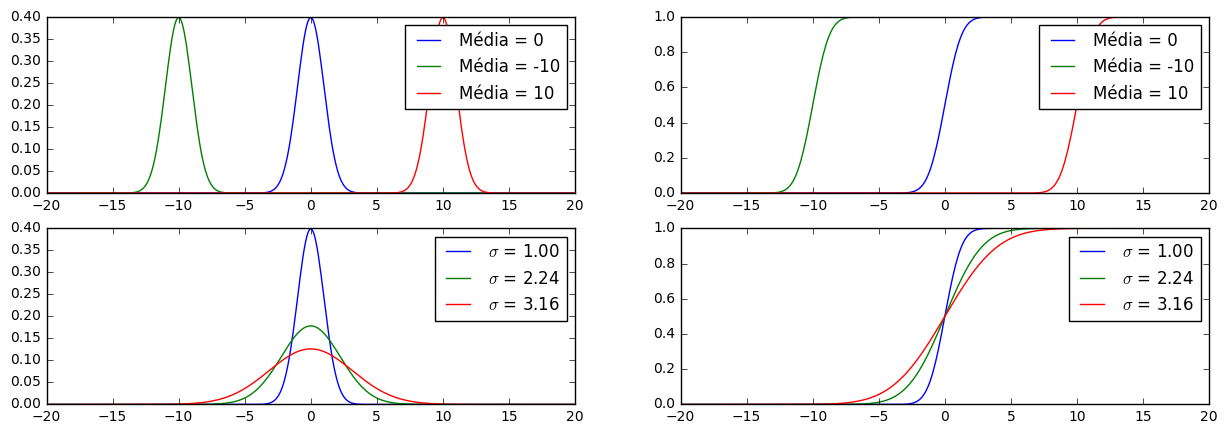

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
#
# Parâmetros da distribuição
vtMu = [0, -10, 10]                  # Valores de média da Gaussiana
vtVar = [1, 5, 10]                   # Valores de variância da Gaussiana
x = np.arange(-20,20,0.1)     
#
# Variando a média e plotando os gráficos
plt.figure(1,[15,5])
sigma = np.sqrt(vtVar[0]);
for il in range(0,len(vtMu)):
    mu = vtMu[il]
    plt.subplot(2,2,1)
    plt.plot(x, norm.pdf(x,mu), label='Média = {}'.format(mu))
    plt.subplot(2,2,2)
    plt.plot(x, norm.cdf(x,mu), label='Média = {}'.format(mu))
# Variando a variância e plotando os gráficos
mu = vtMu[0];
for il in range(0,len(vtVar)):
    sigma = np.sqrt(vtVar[il]);
    plt.subplot(2,2,3)
    plt.plot(x, norm.pdf(x,mu,sigma), label='$\sigma$ = {:01.2f}'.format(sigma))
    plt.subplot(2,2,4)
    plt.plot(x, norm.cdf(x,mu,sigma), label='$\sigma$ = {:01.2f}'.format(sigma))
        
plt.subplot(2,2,1)
plt.legend()
plt.subplot(2,2,2)
plt.legend()
plt.subplot(2,2,3)
plt.legend()
plt.subplot(2,2,4)
plt.legend()
plt.show()

Verifique que a média imprime um comportamento interessante na PDF Gaussiana: desloca seu centro. Já a CDF é também deslocada para direita com o aumento da média. 

Quanto a variância, não existe deslocamento do centro da PDF, mas sim um alargamento da curvas, pois a maior variância induz o aparecimento de amostras com valor absoluto maior (seja negativa ou positivamente). Já na CDF, o 50 percentil (ponto de 0.5 no eixo y) não varia, pois ele é igual a média. Contudo, existe uma inclinação da CDF com o aumento da variância. Quanto menor for a variância, mais a CDF fica em pé.

Algo curioso sobre a PDF Gaussiana é sua aparência com um seno. Vários livros evidenciam esse fato.

**Para o relatório**: Faça os gráficos acima para todas as seguintes distribuições contínuas: Lognormal, Rayleigh, Rice, Nakagami, Weibull, Exponencial. Disserte sobre o significado de cada parâmetro da distribuição e evidencie o comportamento da PDF e da CDF em gráficos. Se tiver dúvida quanto ao formato da PDF e CDF, procure e referencie material que as tenham.

**Passo 2:** Outra utilidade de se conhecer a PDF de uma VA que modela um certo experimento físico é calcular a probabilidade de um evento ocorrer. No código a seguir, supondo que o fênomeno segue uma distribuição Normal (Gaussian de média zero e variância 1), estimamos e ilustramos graficamente a probabilidade de um evento $-\sigma \leq x \leq \sigma$ ocorrer.

 Probabilidade pela integral da fórmula da PDF = 68.2689 %
 Probabilidade pela área da PDF = 68.2689 %


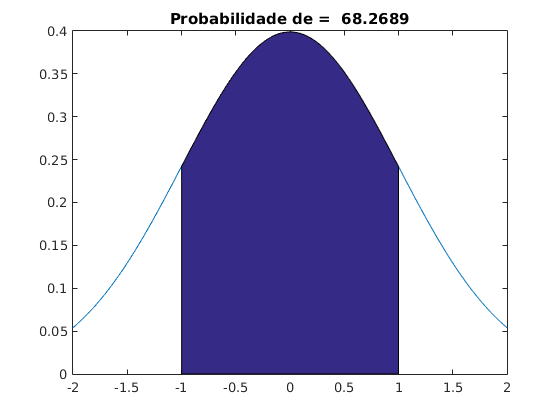

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
# Distribuição
mu = 0                                       # Média
sigma = 1.0                                  # Desvio padrâo
T=0.001                                      # Taxa de amostragem
x=np.arange(-2,2+T,T)                        # Eixo x       
DistNorm=stats.norm.pdf(x,mu,sigma)          # Distribuição normal    
# Cálculo da probabilidade
limite_esquerdo = np.max(np.where(x<-sigma))
limite_direito = np.min(np.where(x>sigma))
indices = np.arange(limite_esquerdo+1,limite_direito)
prob1=np.sum(DistNorm[indices])*T*100        # Probabilidade de um evento ocorrer no intervalo
plt.figure(1,[8,6])
plt.plot(x,DistNorm,'k')                                       
plt.title('Probabilidade de = ' + str(prob1))      # Mostra valor verdadeiro de prob1
plt.fill_between(x[indices],DistNorm[indices],facecolor='midnightblue')
plt.show()
# calculando diretamente da integral
from sympy import *
init_printing(use_unicode=False, wrap_line=False, no_global=True)
x, f = symbols('x f')
f = 1/(sqrt(2*pi*sigma**2))*exp(-(x-mu)**2/(2*sigma**2))
prob2 = integrate(f, (x,-sigma,sigma))
print("Probabilidade pela integral da fórmula da PDF = "+str(prob1)+" %")
print('Probabilidade pela área da PDF {:02.4f}  %'.format(prob2*100))


**Para o relatório:** A vida efetiva de um componente de turbina de avião é de 5000h e desvio padrão de 40h. A distribuição da vida efetiva é bastante próxima da distribuição Normal. Faça um código que calcule e mostre graficamente a probabilidade de que uma determinada amostra tenha vida efetiva maior que 5038h. Faça seu código em **Matlab**.

**Para o relatório:** A duração de chamadas em uma rede telefônica é uma VA com distribuição exponencial de média $\beta$, em minutos/chamada. Duas operadoras mediram: $\beta_1 = 2$ e $\beta_2 = 5$. Foi requisitado que você calculasse qual a probabilidade de assinantes fazerem chamadas com mais de 3 minutos nas duas operadoras. Faça um código que calcule e mostre graficamente as probabilidades. Faça seu código em **Python**.


# Prática 02: Geração de variáveis aleatórias com uma PDF específica

Uma necessidade cotidiana para quem trabalha com prototipagem é a geração de amostras aleatórias com uma determinada distribuição (PDF). Existem vários métodos de geração de VAs, mas um bom gerador aleatório precisa ter algumas características fundamentais para que seja estatisitcamente confiável.

Geradores de números aleatórios são algoritmos matemáticos específicos, sequenciais e determinísticos (se inicializados com o mesmo estado inicial ou **semente**, a mesma sequência de números será produzida). Outra importante característica é o **período** do gerador de números aleatórios. Ele mede o tamanho da sequência de número independentes que o gerador possui. A figura a seguir ilustra o conceito de semente e período.

![fig_GNA](../FIGS/HD_07/GNA.png)

A figura também ilustra a **cauda** do gerador. Ela é uma sequência de números aleatórios que não se repetem.

Os números gerados são, portanto, apenas **pseudoaleatórios**, e com um leve abuso de linguagem são chamados de aleatórios. Portanto, os geradores de números aleatórios influenciam fortemente a qualidade das soluções e o tempo total de execução de técnicas de processamento de sinal aleatório em um computador.

Assim, os geradores de números aleatórios devem ser construídos baseados em uma sólida análise matemática de suas propriedades estruturais. As características principais de um bom gerador de números aleatórios são: 
1. **O período deve ser muito longo**: Um período curto pode fazer com que haja a reciclagem da sequência de números aleatórios, resultando em uma repetição da sequência de eventos. Como consequência, pode haver uma limitação do período útil de uma rodada de simulação;
2. **Os sucessivos valores devem ser independentes e uniformemente distribuídos**: A correlação entre os diversos valores gerados deve ser pequena. A correlação, se significativa, indica dependência. 
3. **Deve ser computacionalmente eficiente**: Uma vez que as simulações podem necessitar da geração de, até mesmo, milhões de números aleatórios em cada execução, o tempo para processar cada geração deve ser mínimo.

A qualidade do gerador de número aleatórios é extremamente importante, mas não precisamos nos preocupar, pois o Python dispõe de geradores de números aleatórios extremamente confiáveis.

**Passo 01:** Abra um script no VS Code, salve-o como **handson7_2.py** e escreva o seguinte código (se for executar o código, não esqueça de mudar o Kernel do Jupyter para Python):

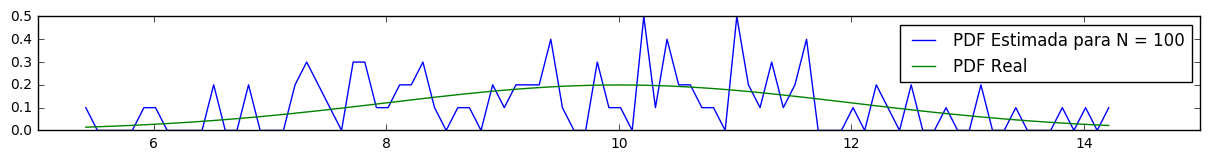

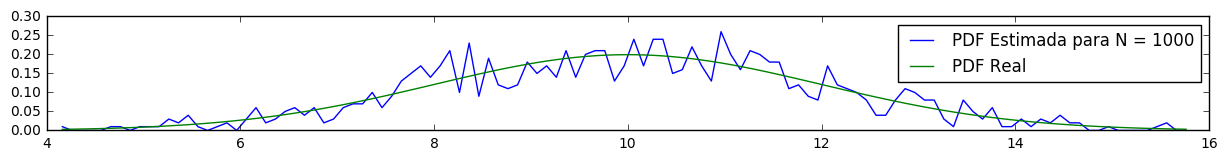

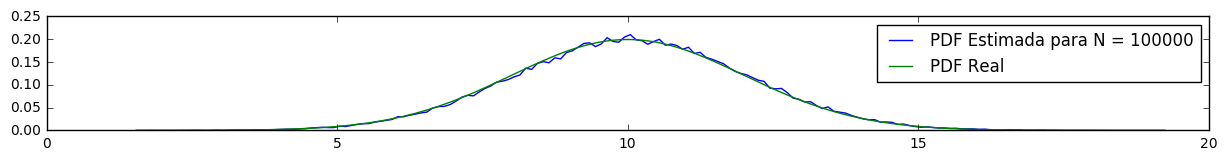

In [1]:
# Geração de Variável aleatória
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
#
# Parâmetros da Gaussiana
mu = 10                                            # Média
sigma = 2                                          # Desvio padrâo
vtnSamples = [1e2, 1e3, 1e5]                       # Número de amostras
vtSamples = sigma * np.random.randn(int(np.max(vtnSamples))) + mu  
for ik in range(0,len(vtnSamples)):
    nSamples = int(vtnSamples[ik])
    plt.figure(1,[15,5])
    plt.subplot('{}1{}'.format(len(vtnSamples),ik+1))
    # PDF estimada
    binWidth = 0.1
    vtCurrentS = vtSamples[:nSamples]
    vtBins = np.arange(np.min(vtCurrentS),np.max(vtCurrentS),binWidth)     
    y, x = np.histogram(vtCurrentS,vtBins)                        
    plt.plot(x[1:len(x)],y/(binWidth*nSamples), label='PDF Estimada para N = {}'.format(nSamples))
    # PDF real
    plt.plot(x[1:len(x)], norm.pdf(x[1:len(x)],mu,sigma), label='PDF Real')
    plt.legend()
    plt.show()

### Comentários sobre o código

- Esse código gera uma sequência de amostras de uma variável aleatória Gaussina com média e variância especificadas. 
```python
mu = 10                                            # Média
sigma = 2                                          # Desvio padrâo
vtnSamples = [1e2, 1e3, 1e5]                       # Número de amostras
vtSamples = sigma * np.random.randn(int(np.max(vtnSamples))) + mu 
```

- Em seguida a PDF é estimada pelo histograma normalizado das amostras geradas. A PDF estimada é comparada com a PDF teórica. Isso é feito separadamente para 1e2, 1e3 e 1e5 amostras (especificados no vetor _vtnSamples_):
```python
for ik in range(0,len(vtnSamples)):
    nSamples = int(vtnSamples[ik])
    plt.figure(1,[15,5])
    plt.subplot('{}1{}'.format(len(vtnSamples),ik+1))
    # PDF estimada
    binWidth = 0.1
    vtCurrentS = vtSamples[:nSamples]
    vtBins = np.arange(np.min(vtCurrentS),np.max(vtCurrentS),binWidth)     
    y, x = np.histogram(vtCurrentS,vtBins)                        
    plt.plot(x[1:len(x)],y/(binWidth*nSamples),label='PDF Estimada para N = {}'.format(nSamples))
    # PDF real
    plt.plot(x[1:len(x)], norm.pdf(x[1:len(x)],mu,sigma), label='PDF Real')
    plt.legend()
    plt.show()
```

- É possível observar que, da mesma forma que o cálculo de uma probabilidade individual, a estimativa da PDF (o histograma) só converge para o parâmetro PDF, quando  o número de amostras é grande. Matematicamente, essa convergência é atinginda quando o número de amostras é infinito (**Lei Forte dos Grandes Números**). Isso deve ser levando em consideração quando formos prototipar algo via simulação. O número de experimentos independentes deve ser grande o suficiente para que a estimativa seja estatiscamente confiável.

### Nota: Lei Forte dos Grandes Números

A **Lei Forte dos Grandes Números** é provavelmente o resultado mais famoso da teoria da probabilidade. Ela estabelece que a média de uma sequência de variáveis aleatórias independentes **com mesma distribuição** converge, **com probabilidade 1**, para a média daquela distribuição. Seja $X_1, X_2, ..., X_n$ uma sequência de variáveis aleatórias independentes e identicamente distribuídas, cada uma com uma média finita $\mu = E[X_i]$, então, com probabilidade 1,

$$\frac{X_1 + X_2 + ... + X_n}{n} \rightarrow \mu , {\rm \; quando \;} n \rightarrow \infty $$

Supondo que _A_ seja um evento e que $\mathbb{P}$(_A_) seja a probabilidade de que _A_ ocorra, fazendo

$$ X_i = \left\{\begin{matrix}
1 & {\rm , se \;} A {\rm \; ocorrer \; na \; i-ésima \; tentativa}
\\ 
0 & {\rm , se \;} A {\rm \; não \; ocorrer \; na \; i-ésima \; tentativa}
\end{matrix}\right.$$

Temos, pela **Lei Forte dos Grandes Números**, que, com probabilidade 1, 

$$\frac{X_1 + X_2 + ... + X_n}{n} \rightarrow  E[X] = \mathbb{P}(A) $$

**Para o relatório:** Gere amostras da VA que representa a observação do número que aparece na face de um dado não tendencioso. Faça a estimativa da PDF, compare com a PDF teórica e plote os gráficos similares ao realizado nessa prática. Faça gráficos para três valores de número de amostras. Disserte e evidencie nos gráficos a convergência entre o histograma e a PDF teórica.

Amostras de uma distribuição contínua, na qual a função distribuição acumulada seja invertível, podem ser geradas a partir da distribuição uniforme. Assim, seja $U$ a distribuição uniforme com valores no intervalo [0,1], e $X$ uma variável aleatória contínua com distribuição acumulada qualquer $F(x)$, podemos escrever,

$$ X \sim F^{-1}(U)$$


Para demonstrar, vamos gerar uma VA com distribuição exponencial por meio de uma VA uniforme. A PDF exponencial é:

$$f_X(x) = \lambda e^{-\lambda x}, \quad x\in(0,\infty).$$

Sua CDF é:

$$F_X(x) = 1- e^{-\lambda x}, \quad x\in(0,\infty).$$

Fazendo $U = F_X(x)$ e isolando $x$, temos:

$$x = -\lambda ln(1-U)$$

Assim, para gerar variáveis aleatórias com distribuição exponencial é preciso gerar variáveis com distribuição uniforme $U$ e aplicar na fórmula acima. O experimento a seguir implementa esse caso.

**Passo 02:** Abra um script no Python, salve-o como **handson7_3.py** e escreva o seguinte código (se for executar o código, não esqueça de mudar o Kernel do Jupyter para Python):

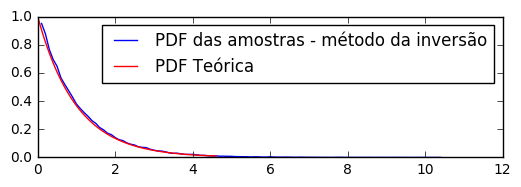

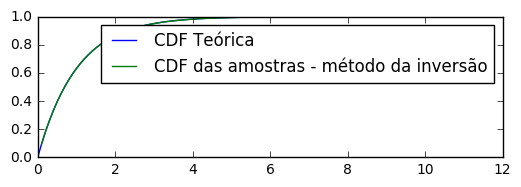

In [53]:
import numpy as np
from scipy.stats import *
import matplotlib.pyplot as plt
# Parâmetros da Gaussiana
lambd=1                                               # Média
nSamples = int(1e5)                                   # Número de amostras
# Amostras geradas pelo método de inversão
vtU = np.random.rand(nSamples)                        # Amostras com distribuição uniforme
vtX = -lambd*np.log(1-vtU);                           # Amostras exponenciais geradas pelo método de inversão
# PDF das amostras geradas
binWidth = 0.1
vtBins = np.arange(np.min(vtX),np.max(vtX),binWidth)     
plt.subplot(211)
y, x = np.histogram(vtX,vtBins)                        
plt.plot(x[1:len(x)],y/(binWidth*nSamples), label='PDF das amostras - método da inversão')
# PDF teórica
xe = np.linspace(expon.ppf(0.01),expon.ppf(0.99), 100)
plt.plot(xe, expon.pdf(xe),'r-', alpha=lambd, label='PDF Teórica')
plt.legend()
plt.show()
# CDF
plt.subplot(212)
# CDF teórica
plt.plot(vtBins, expon.cdf(vtBins,scale=1/lambd), label='CDF Teórica')
# CDF estimada pelas amostras
#y, x = np.histogram(vtX,vtBins, cumulative=True)                        
cumhist = np.cumsum(y/(nSamples)*1)
plt.plot(x[1:len(x)],cumhist, label='CDF das amostras - método da inversão')
plt.legend()
plt.show()

### Comentários sobre o código

- Inialmente, geramos amostras uniformente distribuídas de 0 a 1:
```python
nSamples = int(1e5)                                   # Número de amostras
vtU = np.random.rand(nSamples)                        # Amostras com distribuição uniforme
```

- Posteriormente, aplicamos a $$x = -\lambda ln(1-U)$$ para calcular amostras com distribuição uniforme:
```python
lambd=1                                               # Média
vtX = -lambd*np.log(1-vtU);                           # Amostras exponenciais geradas pelo método de inversão
```

- Finalmente, gráficos de com a estimativa da PDF (Histograma) e CDF são comparados aos gráficos teóricos. Os gráficos simulado e teórico convergem.

Assim, mais uma vez, podemos retornar as perguntas que enumeramos no começo deste experimento:
- **Existe uma função para modelar fenômenos aleatórios?** Como já respondemos, existe, é a Variável Aleatória.
- **Essa função tem uma fórmula?** Como já respondemos, sim, a PDF é uma formulação vinculada a caracterização do fenômeno aleatório. Como vimos, cada PDF tem sua formulação.
- **Essa formulação depende de parâmetros?** Como já respondemos, sim, como vimos cada PDF depende de parâmetros que altera seu formato para modelar diferentes situações do experimento aleatório. Gerlamente, esses parâmetros são estimados empiricamente por meio de medições do fênomeno físico que se quer modelar.
- **De posse desses parâmetros, é possível gerar as saídas de esperimentos aleatórios em um computador?** Sim, podemos gerar um vetor com números aleatórios que possue as propriedades estatísticas do fênomeno físico modelado.

# Prática 3: Metodologia de Monte Carlo (MMC)

Segundo a empresa [Palisade](http://www.palisade-br.com/risk/monte_carlo_simulation.asp), a simulação de Monte Carlo é uma técnica matemática computadorizada que visa efetuar análises quantitativas e auxiliar a tomada de decisões geralmente associadas às análises de risco, sendo utilizada por profissionais de grande variedade de segmentos, tais como: finanças, gerenciamento de projetos, energia, indústrias, engenharia, pesquisa e desenvolvimento, seguros, etc.

De acordo com [J. M. Hammersley and D. C. Handscomb, Monte Carlo Methods, Springer Netherlands, 1964.](http://www.springer.com/us/book/9789400958210), o nome Monte Carlo surgiu no projeto Manhattan durante a segunda guerra mundial (projeto da construção da bomba atômica). O Método que se baseia em amostragens aleatórias massivas para obter resultados numéricos. Por meio de um elevado número de repetições sucessivas do experimento, calcula-se probabilidades heuristicamente (e medidas de métricas do processo simulado), tal como se, de fato, se registrassem os resultados reais. Após todos os experimentos, medidas estatísticas e gráficas extraem informação dos dados gerados, inclusive estabelecendo limites de confiabilidade dos resultados gerados (e.g. um Intervalo de Confiança).

Em telecomunicações, o método de Monte Carlo é usado exaustivamente em análise de enlace e sistêmica (não limitadas a elas). Por exemplo, a estimação da BER (Taxa de Erro de Bits) em um sistema digital, a SINR e a vazão em uma rede de comunicações metropolitana são estimadas com muita precisão via simulação de Monte Carlo. 

Essa importância é tão significativa que as especificações dos sistemas 3G ([Recommendation ITU-R M.1225](https://www.itu.int/dms_pubrec/itu-r/rec/m/R-REC-M.1225-0-199702-I!!PDF-E.pdf)), 4G ([Recommendation ITU-R M.2135](https://www.itu.int/dms_pub/itu-r/opb/rep/R-REP-M.2135-1-2009-PDF-E.pdf)) e 5G ([Recommendation ITU-R M.M.2101](https://www.itu.int/rec/R-REC-M.2101-0-201702-I/en) e [IMT-2020.EVAL](https://www.itu.int/md/R15-SG05-C-0057/en)) foram e estão sendo feitas via simulação de Monte Carlo. Da mesma forma, o setor industrial (fabricantes) concebe e testa muitas das soluções para tais redes via simulação de Monte Carlo.

Daqui pra frente vamos usar a técnica de Monte Carlo para vários experimentos, mas em caráter ilustrativo faremos um experimento para o cálculo do valor do número $\pi$. A modelagem do experimento é a seguinte. 

> Considere um círculo de raio $R$ inscrito em um quadrado de lado $R$. Se analizarmos apenas 1/4 da área do círculo, chegamos à seguinte razão de áreas:

> $$ \frac{A_{circulo}} {4} \cdot \frac{1} {A_{Quadrado}}  = \frac{\pi R^2}{4}  \frac{1}{R^2} = \frac{\pi}{4}$$

> Com isso em mente, o experimento de estimação do valor de $\pi$ consistem em:

> **a)** Desenhar um quadrado com $1/4$ do círculo inscrito nele;

> **b)** Distribuir uniformente objetos pequenos e de tamanho uniforme (e.g. grãos de arroz ou, na simulação, pontos) no quadrado;

>**c)** Contar o número de objetos dentro do círculo e o número total de objetos;

> **d)** Calcular a razão entre os dois contadores e assumi-la como uma estimativa da razão entre as duas áreas $\left( \frac{A_{circulo}} {4} \cdot \frac{1} {A_{Quadrado}}\right )$, que multiplicada por 4, dá o valor de $\pi$.


**Passo 01:** Abra um script no VS Code, salve-o como **handson7_4.py** e escreva o seguinte código:

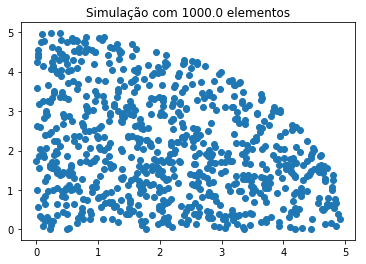

 --------Experimento 0 ---------------
Valor real de pi =  3.141592653589793
 - Número de pontos =  1000.0
 - Razão entre as areas =   0.774
 - pi estimado =   3.096
 - Erro =   0.04559265358979303


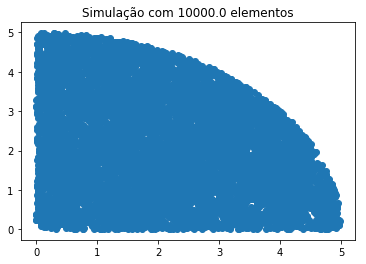

 --------Experimento 1 ---------------
Valor real de pi =  3.141592653589793
 - Número de pontos =  10000.0
 - Razão entre as areas =   0.7857
 - pi estimado =   3.1428
 - Erro =   -0.0012073464102067


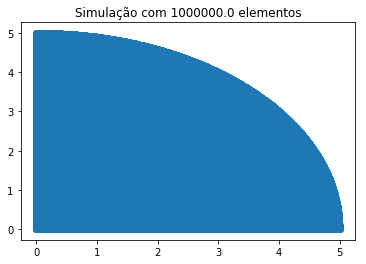

 --------Experimento 2 ---------------
Valor real de pi =  3.141592653589793
 - Número de pontos =  1000000.0
 - Razão entre as areas =   0.785633
 - pi estimado =   3.142532
 - Erro =   -0.0009393464102069871


In [1]:
lQuadrado = 5                                         # Comprimento do quadrado
rCirculo = lQuadrado                                  # Raio do circulo
vtPontos = [1e3,1e4,1e6]                              # 3 números de precisão : 1000, 10000, 1000000

import numpy as np
import matplotlib.pyplot as plt
for ik in range(0,len(vtPontos)):
    nPontos = vtPontos[ik]
    # Pocisionar ponto no quadrado: Mutiplicando um número aleatório de 0 a
    # 1 pelo comprimento do quadrado para distribuir aleatoriamente nas
    # duas dimenções.
    vtSamples = lQuadrado*np.random.rand(1,int(nPontos)) + 1j*lQuadrado*np.random.rand(1,int(nPontos))
    # Testa: 
    # Caso o modulo do vetor > raio do circulo --> 0 
    # Caso o modulo do vetor <= raio do circulo --> 1  
    indexPontCirculo =  np.abs(vtSamples) <= rCirculo 
    # Encontra o numero de elementos dentro da area do circulo.
    razaoArea = len(indexPontCirculo[indexPontCirculo>0])/nPontos
    # Multiplica por 4 pois foi realizado apenas para 1/4 da area do circulo
    valordePi = 4*razaoArea
    # Retorna o valor de pi estimado  
    plt.figure()
    plt.title("Simulação com "+str(nPontos)+" elementos")
    vtPontosCirculo = vtSamples[indexPontCirculo]    
    plt.scatter(vtPontosCirculo.real,vtPontosCirculo.imag)
    plt.show()
    print( ' --------Experimento {} ---------------'.format(ik))
    print("Valor real de pi = ",np.pi)
    print(' - Número de pontos = ', nPontos )
    print(' - Razão entre as areas =  ', razaoArea)
    print( ' - pi estimado =  ' , valordePi)
    print( ' - Erro =  ' ,np.pi-valordePi)      

### Comentários sobre o código

- Fizemos o experimento considerando diferentes valores para a quantidade de amostras ($10^{3}, 10^{4}$ e $10^{7}$). Criaremos um vertor com pontos distribuidos aleatoriamente com a função **rand()** (não tendenciosa). Cada elemento desse vetor deverá ser complexo, modelando um ponto em duas dimensões (_x_+j_y_). 
```python
lQuadrado = 5                                         
rCirculo = lQuadrado                                  
vtPontos = [1e3,1e4,1e6]                              
for ik in range(0,len(vtPontos)):
    nPontos = vtPontos[ik]
    vtSamples = lQuadrado*np.random.rand(1,int(nPontos)) + 1j*lQuadrado*np.random.rand(1,int(nPontos))
```

- Em seguida, testaremos se o módulo de cada amostra é maior que o raio $R$, ou seja, $ABS(x) \leq \sqrt{x_{Real}^{2}+x_{Img}^{2}}$:
```python
indexPontCirculo =  np.abs(vtSamples) <= rCirculo 
```

- Caso positivo, a amostra está dentro do círculo, caso contrário, estará fora. Com isso, contamos o número de pontos dentro do círculo e dividimos pela quantidade total de pontos distribuídos. O valor estimando de $\pi$ será esse valor multiplicado por 4. 
```python
razaoArea = len(indexPontCirculo[indexPontCirculo>0])/nPontos
valordePi = 4*razaoArea
```

- O restante do código é dedicado mostrar um gráfico com os pontos dentro da área de semi-círculo e mostrar os valores real e estimados de $\pi$.

# Prática 4: Teorema central do limite

O teorema do limite central (ou central do limite) é um dos resultados mais extraordinários na teoria da probabilidade. Em linhas gerais, ele diz que a soma de um grande número de variáveis aleatórias independentes tem uma distribuição que é aproximadamente Gaussiana. Com isso, ele não somente fornece um método simples para o cálculo de probabilidades aproximadas para somas de variáveis independentes, mas também ajuda a explicar o extraordinário fato de que frequências empíricas de muitas populações naturais exibem curvas na forma de um sino (isto é, Gaussianas). 

Por essa razão, a distribuição amostral Gaussiana é tão importante, pois qualquer que seja a distribuição da VA em grandes amostras, a distribuição das médias amostrais tendem a convergir gaussianamente conforme o aumento do número de amostras. Mesmo quando a distribuição da população de eventos não segue uma distribuição Gaussiana, a distribuição da média dos dados converge para a distribuição Gaussiana, conforme o tamanho da amostra aumenta. 

Mais formalmente, o teorema do limite central pode ser escrito como:
> Seja $X_1, X_2, ..., X_n$ uma sequência de variáveis aleatórias independentes e identicamente distribuídas, cada uma com média $\mu$ e variância $\sigma^2$. Então, a distribuição de 
> $$\frac{X_1 + X_2 + ... + X_n - n\mu}{\sigma\sqrt{n}}$$
> tende a distribuição Normal (Gausssiana de média zero e variância 1) quando $n \rightarrow \infty$. Isto é, para $-\infty < a < \infty$,
> $$\mathbb{P}\left \{  \frac{X_1 + X_2 + ... + X_n - n\mu}{\sigma\sqrt{n}} \leq a \right\} \rightarrow \frac{1}{\sqrt{2\pi}} e ^{-\frac{x^2}{2}}, {\rm \; quando \;} n \rightarrow \infty $$
> **Fonte:** Capítulo 8 de Sheldon Ross, Probabilidade - Um Curso Moderno com Aplicações, Bookman, 8ª Ed. 2010.

O experimento a seguir modelará um lançamento de dados por um número bastante grande de jogadores. Cada jogador tem direito a uma quantidade de jogadas em um dado de 6 faces (6 pontuações) e é tirado a média. Encontrado a média é elaborado o histograma da distribuição de frequência da média. Esse experimento é realizado para um número variável de jogadas dos dados e a convergência para a distribuição Gausssiana é observada graficamente. Mais uma vez comparamos o tempo de execução de uma versão matricial com uma versão baseada em laços FOR.

**Passo 01:** Abra um script no Python, salve-o como **handson7_5.py** e escreva o seguinte código:



 Para  1  Jogadas
 Tempo com for =  0.12776299999999985 s
 Tempo sem for =  0.0004279999999998729 s
 Ganho da implementação matricial =  99.66500473533036 % menos tempo


 Para  2  Jogadas
 Tempo com for =  0.20649799999999985 s
 Tempo sem for =  0.0006489999999996776 s
 Ganho da implementação matricial =  99.68571124175553 % menos tempo


 Para  50  Jogadas
 Tempo com for =  4.033529 s
 Tempo sem for =  0.014765000000000583 s
 Ganho da implementação matricial =  99.63394337811876 % menos tempo


 Para  100  Jogadas
 Tempo com for =  7.932505000000001 s
 Tempo sem for =  0.02800799999999981 s
 Ganho da implementação matricial =  99.6469211176041 % menos tempo


 Para  200  Jogadas
 Tempo com for =  15.527502999999996 s
 Tempo sem for =  0.04498000000000246 s
 Ganho da implementação matricial =  99.71032045525928 % menos tempo


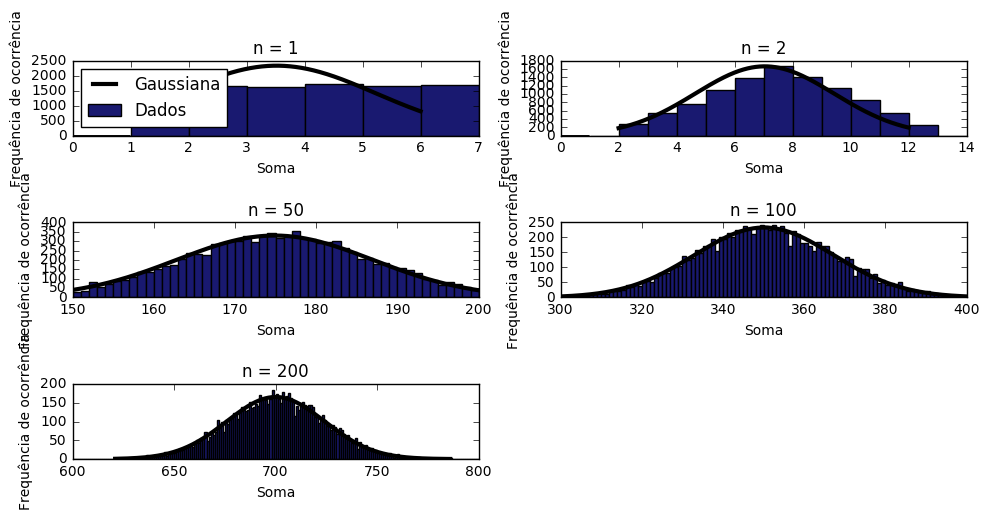

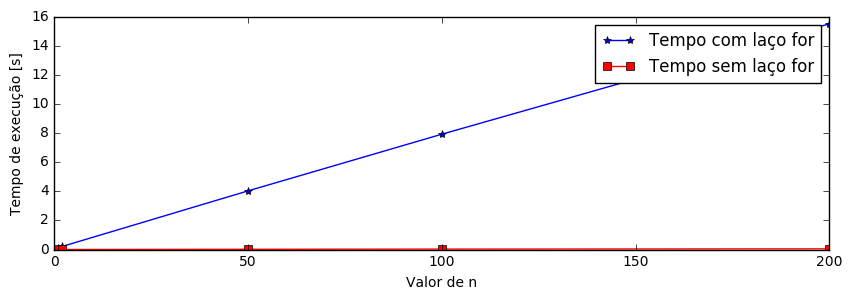

In [2]:
## Parâmetros
# Esse experimento é feito com um dado de 6 faces (6 pontuações de 1 a 6).
# Monta-se um vetor com cada jogada para que possa fazer um laço for com
# cada elemento.
Jogadas = [1, 2, 50, 100, 200]                                      # Número de jogadas do dado
Jogadores = 10000
#
## Simulando as jogadas
# Faremos aqui a criação das jogadas para cada jogador. Montaremos uma
# matriz em que as linhas representarão os resultados (face do dado) e as colunas
# representarão os jogadores. Em seguida será calculado a pontuação de cada
# jogador somando os pontos de cada jogada. Queremos mostrar também o
# quanto é prejudicial em termos de tempo o uso do laço FOR. Simularemos
# para os dois casos e computaremos o tempo:
import numpy as np   
import time 
import matplotlib.pyplot as plt
from matplotlib import mlab 
from scipy import stats
vtdf = np.ndarray([int(len(Jogadas))])
vtdsem = np.ndarray([int(len(Jogadas))])
plt.figure(1,[10,5])
for i_d in range(1,len(Jogadas)+1):
    n = Jogadas[i_d-1]                                        # Para um número "n" de jogadas
    # Implementação com laço FOR (like-C)
    dcfs = time.clock()                                       # Inicia o cronômetro
    x = np.ndarray([n,Jogadores])
    y = np.ndarray([len(x[0,:])])
    # Gera números aleatórios entre o intervalo de 1 a 6 (faces do dado)
    for ic in range(n):
        for ij in range(0,Jogadores):
            x[ic,ij]=np.ceil(6*np.random.rand(1,1))        
    # Soma os números de cada jogador
    for ik in range(len(x[0,:])):
        y[ik]=sum(x[:,ik])                                    # Soma os pontos de cada jogador
    df = time.clock() - dcfs
    #
    print('\n')                                               # Pula linha
    print(' Para ',n,' Jogadas')                              # Mostra número de jogadas atual 
    print(' Tempo com for = ',df,'s')                         # Mostra tempo
    #
    # Implementação matricial (like-Matlab)
    dsfs = time.clock()                                       # Inicia o cronômetro
    x = np.ceil(6*np.random.rand(n,Jogadores))                # Gera matriz com jogadas
    y = sum(x) # Calcula a pontuação de cada jogador, equivalente a sum(x,1) do Matlab
    dsem = time.clock() - dsfs                                # Tempo de execuçaõ sem FOR
    print(' Tempo sem for = ',dsem,'s')                       # Mostra tempo
    # Razão entre tempos 
    print(' Ganho da implementação matricial = ',100*(df-dsem)/df,'% menos tempo')
    #
    ## Display
    # O número de plots dependerá da quantidade de elementos do vetor Jogadas.
    # Em seguida no subplot() determinaremos quantos plots serão efetuados e
    # qual a posição. Cada elemento de jogadas será representado em um quadrado
    # no subplot.
    nPlots=len(Jogadas)                                       # Número de plots     
    pos = i_d 
    plt.subplot('{}2{}'.format(int(np.ceil(len(Jogadas)/2)),pos))         # Determinação de posicionamento dos plots
    binCtrs = np.arange(0,n*7+1,1)                            # Centro de cada coluna dependem de "n"
    # Histograma gaussiano estimado
    mi = np.mean(y)                                           # Calcula média de cada jogador
    des = np.std(y)
    Tp = 1/Jogadores                                          # Calcula desvio padrão de cada jogador
    xi = np.arange(np.min(y),np.max(y),Tp)
    ye = (1/Tp)*stats.norm.pdf(xi,mi,des)                     # Histograma estimado 
    plt.plot(xi,ye,'k',linewidth=3.0)                         # Plota histograma esperado como linha
    plt.hist(y,bins=binCtrs,color='midnightblue')             # Plota Histograma para cada eixo
    if n>2:plt.xlim([3*n,4*n]) 
    plt.title('n = '+ str(n))
    plt.xlabel('Soma')
    plt.ylabel('Frequência de ocorrência')
    # Legenda apenas no primeiro
    if (i_d==1):
        plt.legend(['Gaussiana','Dados'],loc='upper left')
    #
    vtdf[i_d-1] = df                                          # Armazena vetor com tempo com FOR
    vtdsem[i_d-1] = dsem                                      # Armazena vetor com tempo sem FOR    
    
plt.tight_layout()
plt.show()
    
# Novo plot para relacionar tempos de execução

plt.figure(2,[10,3])
plt.plot(Jogadas,vtdf,'b-*')
plt.plot(Jogadas,vtdsem,'r-s')
plt.legend(['Tempo com laço for','Tempo sem laço for'])
plt.xlabel('Valor de n')
plt.ylabel('Tempo de execução [s]')
plt.show()

### Comentários sobre o código

- O código é feito para um número de 10000 jogadores e para um número variável de jogadas de dado de cada jogador:
```python
Jogadas = [1, 2, 50, 100, 200]    # Número de jogadas do dado
Jogadores = 10000
```

- A implementação por laços FOR gera a quantidade de jogadas para cada jogador e, posteriormente, soma a pontuação de cada jogador. Para tal, são necessários 3 laços.
```python
for i_d in range(1,len(Jogadas)+1):
    ...
    # Gera números aleatórios entre o intervalo de 1 a 6 (faces do dado)
    for ic in range(n):
        for ij in range(0,Jogadores):
            x[ic,ij]=np.ceil(6*np.random.rand(1,1))        
    # Soma os números de cada jogador
    for ik in range(len(x[0,:])):
        y[ik]=sum(x[:,ik])       
```

- Já a implementação matricial dispensa o uso de laços. Existe uma economia de tempo e de linhas de código. Compare:
```python
for i_d in range(1,len(Jogadas)+1):
    ...
    # Implementação matricial (like-Matlab)
    x = np.ceil(6*np.random.rand(n,Jogadores))                # Gera matriz com jogadas
    y = sum(x) # Calcula a pontuação de cada jogador, equivalente a sum(x,1) do Matlab
```

Nota-se que houve uma distribuição normal cujo média é dada por **mean(y)** e o desvio padrão é dado por **std(y)**. Com um grande número de jogadores (10 mil) foi possível chegar a algo bastante aproximado à distribuição Gaussina.

Além disso, pudemos ver que a implementação matricial economizou por volta de 99% de tempo, tanto no Matlab quanto no Python.

Outro exemplo ilustrativo e muito vinculado a nosso cotidiano é o Gráfico da Média de Conclusão Normalizada no SIGAA (Ensino -> Consultar índices academicos). Esse gráfico mostra a média de conclusão de todos alunos que já se formaram no curso em questão, todos convergindo para uma Gaussiana de média $\mu$ e desvio padrão $\sigma$, que dependem do desempenho dos alunos. 

# Bibliografia

[Sheldon Ross, Probabilidade - Um Curso Moderno com Aplicações, Bookman, 8ª Ed. 2010.](https://www.saraiva.com.br/probabilidade-um-curso-moderno-com-aplicacoes-8-ed-2010-2878005.html)

[Athanasios Papoulis e S. Unnikrishna Pillai, Probability, Random Variables and Stochastic Processes, McGraw-Hill Europe, 4th edition, 2002).](https://www.amazon.com/Probability-Random-Variables-Stochastic-Processes/dp/0071226613)

[Douglas C. Montgomery e George C. Runger, Estatística Aplicada e Probabilidade Para Engenheiros, LTC, 6ª Edição, 2016](https://www.amazon.com.br/Estat%C3%ADstica-Aplicada-Probabilidade-Para-Engenheiros/dp/852163241X?tag=goog0ef-20&smid=A1ZZFT5FULY4LN&ascsubtag=c5ae9f04-d7a7-47a0-b793-3fbfb6c6c8af)

BARBETTA, REIS e BORNIA – Estatística para Cursos de Engenharia e Informática, Atlas, 2004.

Marcelo Alencar, PROBABILIDADE E PROCESSOS ESTOCASTICOS, ERICA, 2014.

[Carlos Eduardo Costa Vieira, Reinaldo de Castro e Souza e Celso da Cruz Carneiro Ribeiro, Um Estudo Comparativo entre Três Geradores de Números Aleatórios, PUC-Rio, 2004.](ftp://ftp.inf.puc-rio.br/pub/docs/techreports/04_16_vieira.pdf)

[Fernando J. Von Zuben, Notas de Aula IA707, DCA/FEEC/Unicamp.](ftp://ftp.dca.fee.unicamp.br/pub/docs/vonzuben/ia707_1s11/notas_de_aula/topico8_IA707_1s11.pdf)

[PUC-RS, UMA INTRODUÇÃO AOS MÉTODOS DE GERAÇÃO DE NÚMEROS E
VARIÁVEIS ALEATÓRIAS PARA APLICAÇÕES EM SIMULADORES](http://www.pucrs.br/famat/viali/especializa/mia_ima_fafis/material/ead/outros/Geracao_de_numeros_e_variaveis_aleatorias.pdf)

PALISADE – Simulação de Monte Carlo, 2015.  Disponível em: http://www.palisade-br.com/risk/monte_carlo_simulation.asp.  Acessado em 04/10/17.

Carlos Ferreira, Simulação de Monte Carlo Aplicada a Projetos, 2015.  Disponível em: http://www.gp4us.com.br/simulacao-de-monte-carlo/.  Acessado em 04/10/17.

[Portalaction, Probabilidade](http://www.portalaction.com.br/probabilidades)


[Luiz Renato Fontes , Notas introdutórias em probabilidade e estatística](https://www.ime.usp.br/~lrenato/notas.html)